In [2]:
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os

def plot_pt_heatmap(
    pt_path: str,
    scale: str = "linear",
    cmap: str = "viridis",
    vmin: float = None,
    vmax: float = None,
    save_path: str = None
):
    """
    Load a .pt file containing a heatmap tensor (or dict with key "heat")
    and display it with either linear or logarithmic color scaling.

    Args:
      pt_path   : path to your .pt (e.g. "heatmap_run1.pt")
      scale     : "linear" or "log"
      cmap      : any matplotlib colormap name
      vmin,vmax : manual color-range bounds (defaults to data min/max)
      save_path : if given, the figure is saved here (e.g. "hm.png")

    Example:
      plot_pt_heatmap("heatmap_run1.pt", scale="log", save_path="heatmap_run1_log.png")
    """
    # — load the tensor —
    data = torch.load(pt_path)
    heat = data["heat"] if isinstance(data, dict) and "heat" in data else data
    heat = heat.cpu().numpy()

    # — build normalization object —
    norm = None
    if scale.lower() == "log":
        # avoid zeros
        nonzero = heat[heat > 0]
        vmin_ = vmin if vmin is not None else nonzero.min()
        vmax_ = vmax if vmax is not None else heat.max()
        norm = LogNorm(vmin=vmin_, vmax=vmax_)

    # — plot —
    plt.figure(figsize=(10, 5))
    im = plt.imshow(
        heat,
        aspect="auto",
        origin="lower",
        norm=norm,
        vmin=None if norm else vmin,
        vmax=None if norm else vmax,
        cmap=cmap
    )
    cb = plt.colorbar(im, pad=0.02)
    cb.set_label(f"Value ({scale} scale)")
    plt.xlabel("Head index")
    plt.ylabel("Layer index")
    plt.title(f"Heatmap: {os.path.basename(pt_path)}  [{scale}]")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Saved heatmap plot to {save_path}")

    plt.show()


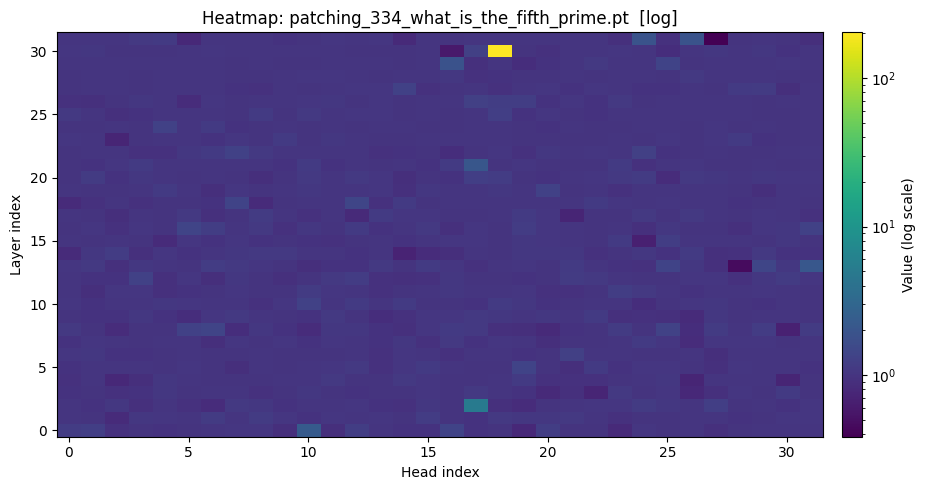

In [4]:
plot_pt_heatmap(
    pt_path="patching_analysis/patching_334_what_is_the_fifth_prime.pt",
    scale= "log",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= None
)

In [9]:
torch.save(torch.load("patching_analysis/patching_eval_what_is_the_fifth_prime_think_distance.pt")['heat'], "patching_analysis/patching_eval_what_is_the_fifth_prime_think_distance_tensor_only.pt")

In [11]:
torch.load("patching_analysis/patching_eval_what_is_the_fifth_prime_think_distance_tensor_only.pt")

tensor([[-0.8775, -0.8959, -0.9493,  ..., -0.9987, -0.9974, -0.9991],
        [-0.9855, -0.9933, -0.8294,  ..., -0.9623, -0.9713, -0.9764],
        [-0.9774, -0.9737, -0.9289,  ..., -0.9892, -0.9914, -0.9910],
        ...,
        [-0.9971, -0.9944, -0.9984,  ..., -0.9898, -0.9882, -0.9923],
        [-0.9598, -0.8945, -0.9902,  ..., -0.9919, -0.9921, -0.9595],
        [-0.9907, -0.9815, -0.9840,  ..., -0.9956, -0.9957, -0.9686]])

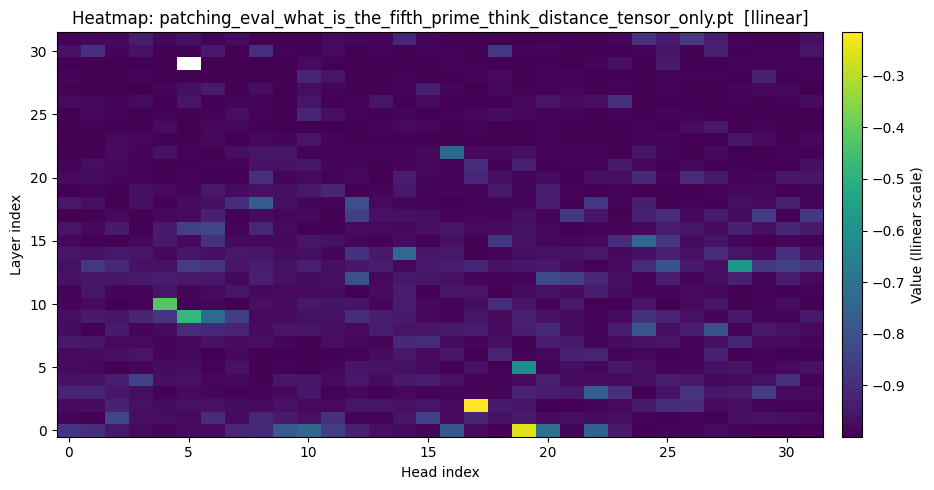

In [12]:
plot_pt_heatmap(
    pt_path="patching_analysis/patching_eval_what_is_the_fifth_prime_think_distance_tensor_only.pt",
    scale= "llinear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= None
)

In [ ]:
# I think I need to repeat this analysis 

In [13]:
def read_prompts(file_path="mds/reasoning-prompts.md"):
    """
    Read prompts from a text file and return them as a list of strings.
    
    Args:
        file_path (str): Path to the file containing reasoning prompts
        
    Returns:
        list: A list of strings, each containing a reasoning prompt
    """
    prompts = []
    
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                # Skip empty lines, headers, and category labels
                line = line.strip()
                if (line and 
                    not line.startswith('#') and 
                    not line.startswith('##') and
                    not line == ""):
                    
                    # Extract the prompt text by removing the number and period
                    parts = line.split('. ', 1)
                    if len(parts) > 1 and parts[0].isdigit():
                        prompt = parts[1]
                    else:
                        prompt = line
                        
                    prompts.append(prompt)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"Error reading prompts: {e}")
    
    return prompts

In [17]:
read_prompts()[:50]

['What is the square root of 144?',
 'If x + 5 = 12, what is the value of x?',
 "What integer's square root is closest to 6.3?",
 'What is (2 + 7) × 4?',
 'If I have 24 marbles and give away 1/3 of them, how many do I have left?',
 'What is 15% of 80?',
 'If a rectangle has a length of 8 cm and a width of 5 cm, what is its perimeter?',
 'What is the sum of the first 10 integers?',
 'If 3x - 7 = 14, what is the value of x?',
 'What is the average of 17, 23, and 30?',
 'If a car travels at 60 miles per hour, how far will it travel in 2.5 hours?',
 'What is the area of a circle with radius 4 cm? (Use π = 3.14)',
 'If y = 3x + 2 and x = 4, what is y?',
 'What is the next number in the sequence: 2, 4, 8, 16, ...?',
 'If a triangle has sides of length 3, 4, and 5, what is its area?',
 'What is 7² - 3²?',
 'If 20% of a number is 35, what is the number?',
 'What is the product of 1.5 and 0.8?',
 'If a pizza is cut into 8 equal slices and 3 slices are eaten, what fraction remains?',
 'What is t

In [42]:
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import numpy as np

In [43]:
heat = torch.load("heatmap_collection_experiment/mode_heatmapsmode_heatmap_5ad9bd20cf28ba58811b63ec54666908.pt")['heat']

Saved heatmap plot to mean_heatmap.png


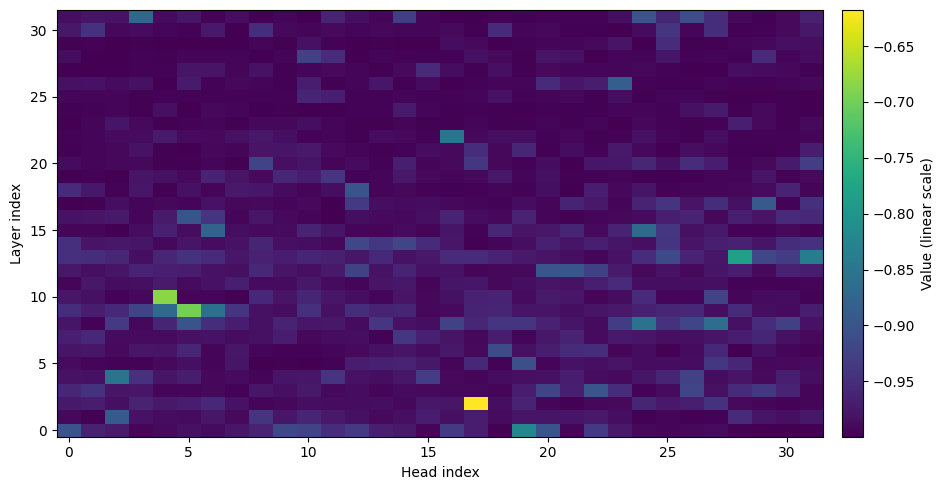

Saved heatmap plot to variance_heatmap.png


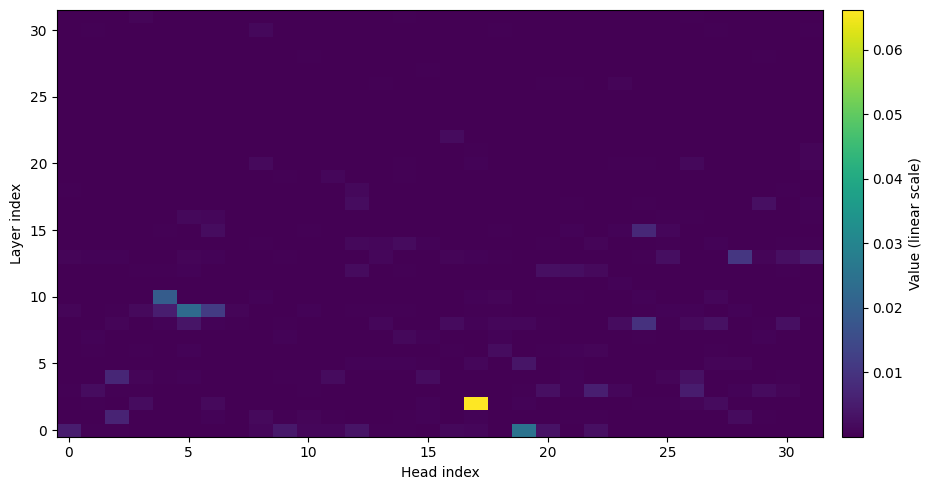

In [44]:
import glob 

heatmap_files = glob.glob("heatmap_collection_experiment/mode_heatmaps*.pt")
total_heat = []

for heatmap_file in heatmap_files:
    total_heat.append(torch.load(heatmap_file)['heat'].numpy())


total_heat = np.stack(total_heat)
# compute the variance over dim0 given that we might have nans
total_heat_variance = np.zeros((total_heat.shape[1], total_heat.shape[2]))
for i in range(total_heat.shape[1]):
    for j in range(total_heat.shape[2]):
        total_heat_variance[i, j] = np.nanvar(total_heat[:, i, j])

total_heat_mean = np.nanmean(total_heat, 0)

relative_heat_variance = np.abs(total_heat_variance / total_heat_mean)

# now we can plot the mean and variance of the heatmaps

def plot_pt_heatmap(
    heat: np.ndarray,
    scale: str = "linear",
    cmap: str = "viridis",
    vmin: float = None,
    vmax: float = None,
    save_path: str = None
):
    """
    Display a heatmap with either linear or logarithmic color scaling.

    Args:
      heat      : numpy array of the heatmap
      scale     : "linear" or "log"
      cmap      : any matplotlib colormap name
      vmin,vmax : manual color-range bounds (defaults to data min/max)
      save_path : if given, the figure is saved here (e.g. "hm.png")
    """
    # — build normalization object —
    norm = None
    if scale.lower() == "log":
        # avoid zeros
        nonzero = heat[heat > 0]
        vmin_ = vmin if vmin is not None else nonzero.min()
        vmax_ = vmax if vmax is not None else heat.max()
        norm = LogNorm(vmin=vmin_, vmax=vmax_)

    # — plot —
    plt.figure(figsize=(10, 5))
    im = plt.imshow(
        heat,
        aspect="auto",
        origin="lower",
        norm=norm,
        vmin=None if norm else vmin,
        vmax=None if norm else vmax,
        cmap=cmap
    )
    cb = plt.colorbar(im, pad=0.02)
    cb.set_label(f"Value ({scale} scale)")
    plt.xlabel("Head index")
    plt.ylabel("Layer index")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Saved heatmap plot to {save_path}")

    plt.show()
plot_pt_heatmap(
    heat=total_heat_mean,
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "mean_heatmap.png"
)
plot_pt_heatmap(
    heat=relative_heat_variance,
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "variance_heatmap.png"
)
# I think I need to repeat this analysis for the other heatmaps

In [ ]:
# interesting... 
# does the 2, 17 head have an outsized impact on answering 
# is that what triggers answering?
# the problem is, this would also be the case if 2, 17 were simply breaking the model the most 

# a good way to test it would be to explicitly look at the logit for the top distinguishing answer token 

# todo: add a function which collects the top distinguishing answer token 


In [40]:
# get the argmax of the mean heatmap
argmax = np.unravel_index(np.argmax(total_heat_mean, axis=None), total_heat_mean.shape)

In [41]:
argmax

(np.int64(2), np.int64(17))

Saved heatmap plot to mean_heatmap.png


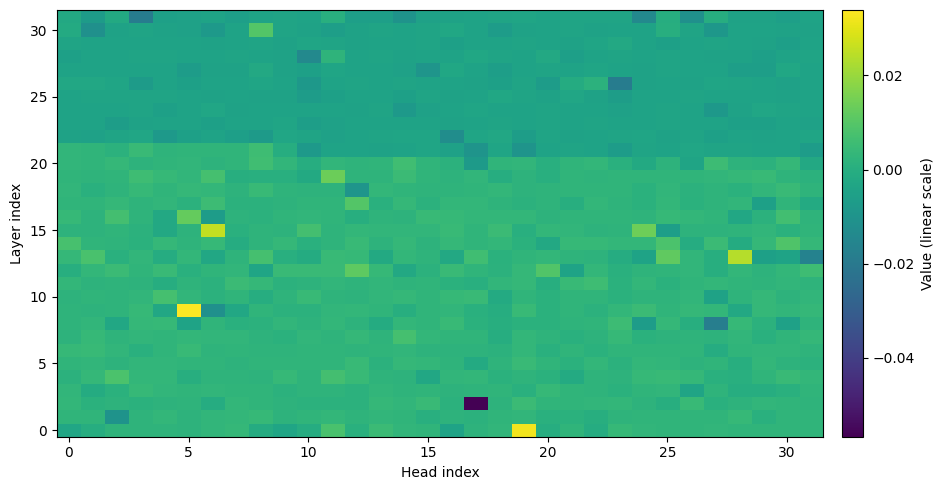

Saved heatmap plot to variance_heatmap.png


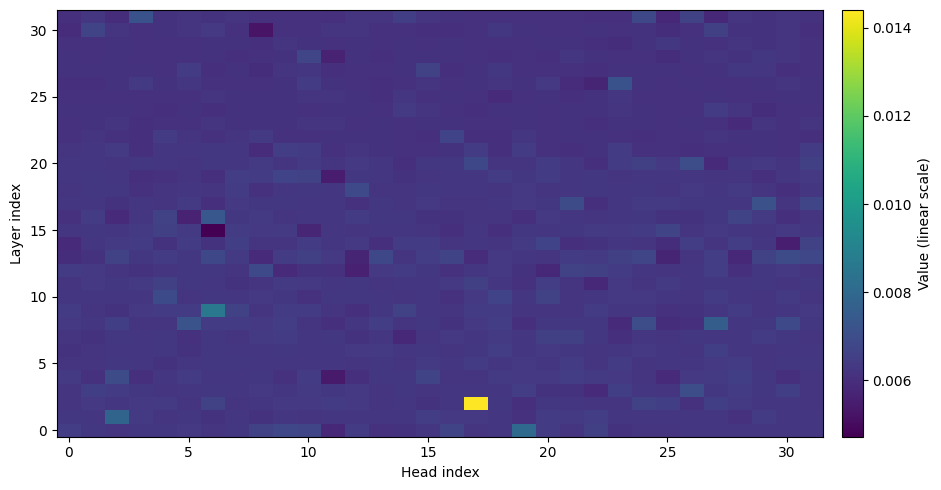

In [55]:
import glob 

heatmap_files = glob.glob("/root/mech_interp_research/js_dist_heatmap_collection_experiment/JS_dist_ans_heatmap_*.pt")
total_heat = []

for heatmap_file in heatmap_files:
    total_heat.append(torch.load(heatmap_file)['heat'].numpy())


total_heat = np.stack(total_heat)
# compute the variance over dim0 given that we might have nans
total_heat_variance = np.zeros((total_heat.shape[1], total_heat.shape[2]))
for i in range(total_heat.shape[1]):
    for j in range(total_heat.shape[2]):
        total_heat_variance[i, j] = np.nanvar(total_heat[:, i, j])

total_heat_mean = np.nanmean(total_heat, 0)

relative_heat_variance = np.abs(total_heat_variance / total_heat_mean)

# now we can plot the mean and variance of the heatmaps

def plot_pt_heatmap(
    heat: np.ndarray,
    scale: str = "linear",
    cmap: str = "viridis",
    vmin: float = None,
    vmax: float = None,
    save_path: str = None
):
    """
    Display a heatmap with either linear or logarithmic color scaling.

    Args:
      heat      : numpy array of the heatmap
      scale     : "linear" or "log"
      cmap      : any matplotlib colormap name
      vmin,vmax : manual color-range bounds (defaults to data min/max)
      save_path : if given, the figure is saved here (e.g. "hm.png")
    """
    # — build normalization object —
    norm = None
    if scale.lower() == "log":
        # avoid zeros
        nonzero = heat[heat > 0]
        vmin_ = vmin if vmin is not None else nonzero.min()
        vmax_ = vmax if vmax is not None else heat.max()
        norm = LogNorm(vmin=vmin_, vmax=vmax_)

    # — plot —
    plt.figure(figsize=(10, 5))
    im = plt.imshow(
        heat,
        aspect="auto",
        origin="lower",
        norm=norm,
        vmin=None if norm else vmin,
        vmax=None if norm else vmax,
        cmap=cmap
    )
    cb = plt.colorbar(im, pad=0.02)
    cb.set_label(f"Value ({scale} scale)")
    plt.xlabel("Head index")
    plt.ylabel("Layer index")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Saved heatmap plot to {save_path}")

    plt.show()
plot_pt_heatmap(
    heat=total_heat_mean-np.mean(total_heat_mean),
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "mean_heatmap.png"
)
plot_pt_heatmap(
    heat=relative_heat_variance,
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "variance_heatmap.png"
)
# I think I need to repeat this analysis for the other heatmaps

Saved heatmap plot to mean_heatmap.png


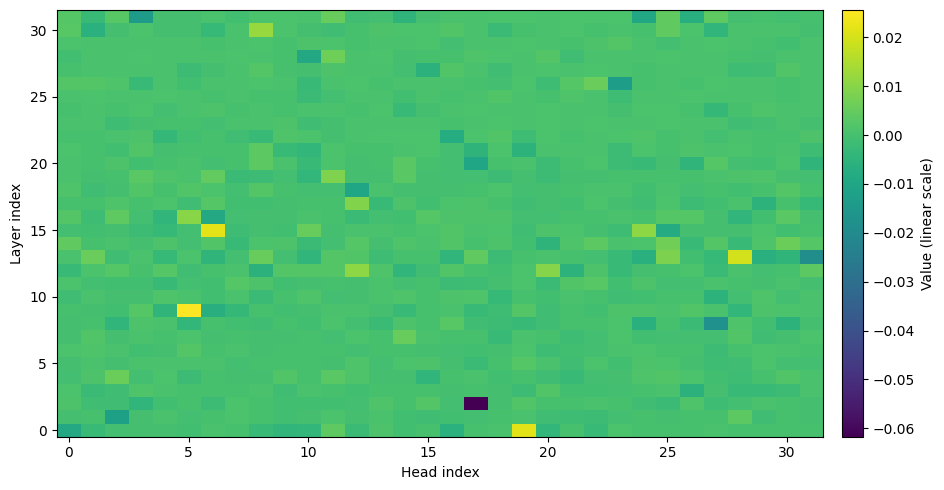

Saved heatmap plot to variance_heatmap.png


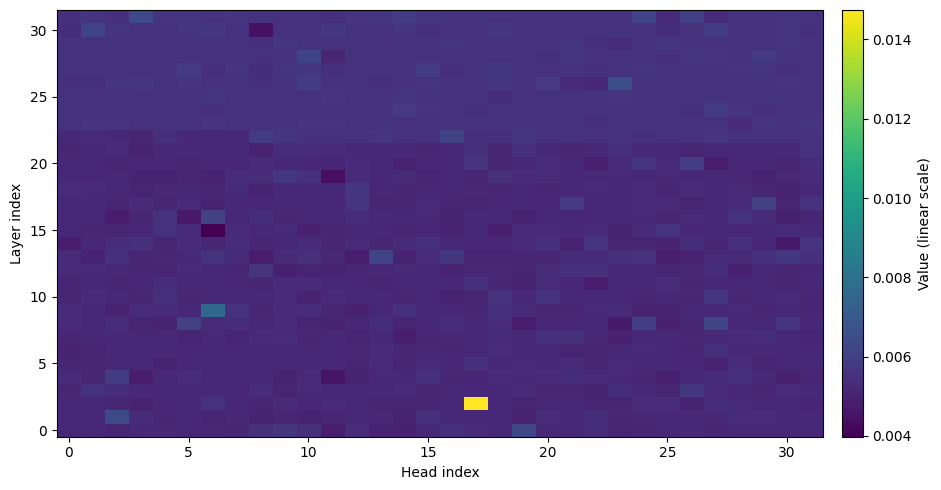

In [57]:
import glob 

heatmap_files = glob.glob("/root/mech_interp_research/immediately_answer_js_dist_heatmap_collection_experiment/JS_dist_ans_heatmap_*.pt")
total_heat = []

for heatmap_file in heatmap_files:
    total_heat.append(torch.load(heatmap_file)['heat'].numpy())

total_heat = np.stack(total_heat)
# compute the variance over dim0 given that we might have nans
total_heat_variance = np.zeros((total_heat.shape[1], total_heat.shape[2]))
for i in range(total_heat.shape[1]):
    for j in range(total_heat.shape[2]):
        total_heat_variance[i, j] = np.nanvar(total_heat[:, i, j])

total_heat_mean = np.nanmean(total_heat, 0)

relative_heat_variance = np.abs(total_heat_variance / total_heat_mean)

# now we can plot the mean and variance of the heatmaps

def plot_pt_heatmap(
    heat: np.ndarray,
    scale: str = "linear",
    cmap: str = "viridis",
    vmin: float = None,
    vmax: float = None,
    save_path: str = None
):
    """
    Display a heatmap with either linear or logarithmic color scaling.

    Args:
      heat      : numpy array of the heatmap
      scale     : "linear" or "log"
      cmap      : any matplotlib colormap name
      vmin,vmax : manual color-range bounds (defaults to data min/max)
      save_path : if given, the figure is saved here (e.g. "hm.png")
    """
    # — build normalization object —
    norm = None
    if scale.lower() == "log":
        # avoid zeros
        nonzero = heat[heat > 0]
        vmin_ = vmin if vmin is not None else nonzero.min()
        vmax_ = vmax if vmax is not None else heat.max()
        norm = LogNorm(vmin=vmin_, vmax=vmax_)

    # — plot —
    plt.figure(figsize=(10, 5))
    im = plt.imshow(
        heat,
        aspect="auto",
        origin="lower",
        norm=norm,
        vmin=None if norm else vmin,
        vmax=None if norm else vmax,
        cmap=cmap
    )
    cb = plt.colorbar(im, pad=0.02)
    cb.set_label(f"Value ({scale} scale)")
    plt.xlabel("Head index")
    plt.ylabel("Layer index")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        print(f"Saved heatmap plot to {save_path}")

    plt.show()
plot_pt_heatmap(
    heat=total_heat_mean-np.mean(total_heat_mean),
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "mean_heatmap.png"
)
plot_pt_heatmap(
    heat=relative_heat_variance,
    scale= "linear",
    cmap= "viridis",
    vmin= None,
    vmax= None,
    save_path= "variance_heatmap.png"
)
# I think I need to repeat this analysis for the other heatmaps